# Task 2: Implement a system that can classify the absence or presence of heart disease

Binary classification

### Get Data

In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data_from_csv(data_path):
    return pd.read_csv(data_path)

In [3]:
DATASET_FOLDER = 'Dataset'
DATASET_FILE = 'heart.csv'
DATASET_FILE_PATH = os.path.join(DATASET_FOLDER, DATASET_FILE)

In [4]:
data = load_data_from_csv(DATASET_FILE_PATH)

In [5]:
data.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [6]:
data.describe()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age               270 non-null float64
sex               270 non-null float64
chest_pain        270 non-null float64
blood_press       270 non-null float64
serum_chol        270 non-null float64
blood_sugar       270 non-null float64
electrocard       270 non-null float64
max_heart_rate    270 non-null float64
induced_ang       270 non-null float64
oldpeak           270 non-null float64
peak_st_seg       270 non-null float64
major_ves         270 non-null float64
thal              270 non-null float64
presence          270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB


## Before we start doing something create TEST SET and put aside

I will go for 20 % test 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print('Train instances:', len(train_set), '\nTest instances: ', len(test_set))

Train instances: 216 
Test instances:  54


## Let's Analyze the data

In [10]:
data = train_set.copy()

Let's take a look at distibution

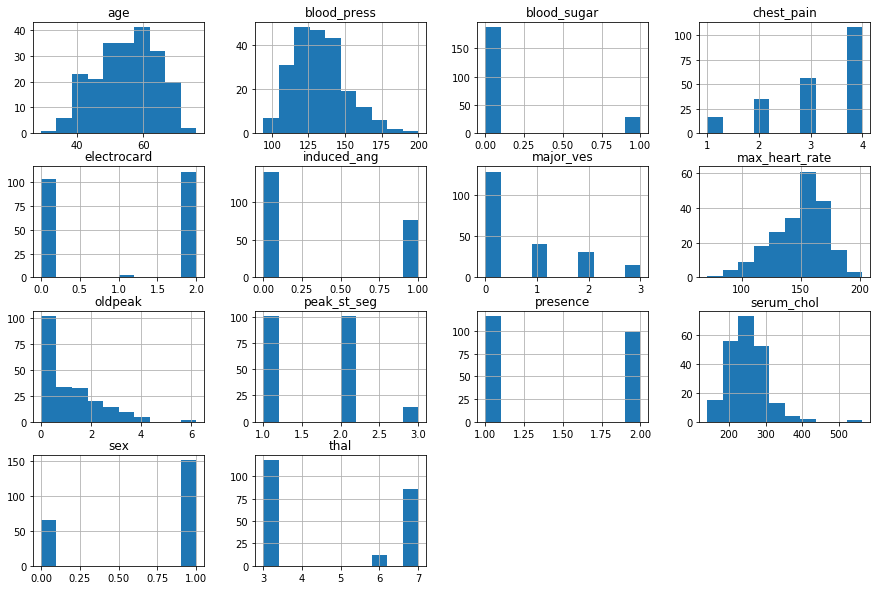

In [11]:
data.hist(figsize=(15,10))
plt.show()

We can also analyze correlation of our features

In [12]:
corr_matrix = data.corr()

In [13]:
corr_matrix['presence'].sort_values(ascending=False)

presence          1.000000
thal              0.530005
oldpeak           0.455766
induced_ang       0.450750
major_ves         0.437676
chest_pain        0.431482
peak_st_seg       0.379881
sex               0.279393
age               0.193232
blood_press       0.186431
electrocard       0.115210
serum_chol        0.088730
blood_sugar      -0.035203
max_heart_rate   -0.402942
Name: presence, dtype: float64

Oh Woow! It feels like I have a strong correlation(>40 %) with following features: 

thal, oldpeak, induced_ang, major_ves, chest_pain, max_heart_rate

## Prepare data for training

In [14]:
data_labels = data['presence'].copy()

In [15]:
data_labels.head()

115    1
33     2
184    1
142    2
197    1
Name: presence, dtype: int64

In [16]:
data_labels.describe()

count    216.000000
mean       1.458333
std        0.499418
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: presence, dtype: float64

In [17]:
data = data.drop('presence', axis=1)

In [18]:
data.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal
115,49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0
33,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0
184,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
142,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0
197,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0


In [19]:
data.shape

(216, 13)

In [20]:
DATA_BEFORE_NORM = data.copy()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [23]:
num_attribs = list(data.columns)

full_pipeline = ColumnTransformer([
        ("num",num_pipeline, num_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [24]:
data_prepared

array([[-0.63296991, -1.52416434, -1.21490572, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [ 0.46519475,  0.65609723,  0.8432875 , ...,  2.30559959,
        -0.71458405,  1.15321806],
       [-0.19370404,  0.65609723, -0.18580911, ..., -0.98159191,
         2.4141353 , -0.90541914],
       ...,
       [ 0.24556182, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914],
       [-0.41333698,  0.65609723, -0.18580911, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [-0.63296991, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914]])

In [25]:
data_prepared.shape

(216, 13)

In [26]:
data_labels.shape

(216,)

In [27]:
DATA_AFTER_NORM = data_prepared.copy()

Nice! Good to go!

# Summary of all steps above

In [28]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

%matplotlib inline

DATASET_FOLDER = 'Dataset'
DATASET_FILE = 'heart.csv'

def get_data(DATASET_DIR_PATH=DATASET_FOLDER, DATASET_FILE_NAME=DATASET_FILE):
    DATASET_FILE_PATH = os.path.join(DATASET_DIR_PATH, DATASET_FILE_NAME)
    data = pd.read_csv(DATASET_FILE_PATH)
    return data

def extract_data_and_labels(data):
    data_labels = data['presence'].copy()
    data = data.drop('presence', axis=1)
    return data, data_labels

def prep_data_for_algo(data):
    num_attribs = list(data.columns)
    
    num_pipeline = Pipeline([
            ('std_scaler', StandardScaler()),
        ])
    
    transform_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attribs),
        ])
    data_prepared = transform_pipeline.fit_transform(data)
    return data_prepared

data = get_data()
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

data_train, data_train_labels = extract_data_and_labels(train_set)
data_test, data_test_labels = extract_data_and_labels(test_set)

data_train_prepared = prep_data_for_algo(data_train)
data_test_prepared = prep_data_for_algo(data_test)

# Evaluation Metrics

We will evaluate using following metrics:

1. Accuracy
2. Precision
3. Recall
4. F1 Score

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

In [30]:
from sklearn.metrics import roc_curve

def compute_and_plot_roc_curve(data_labels, predictions):
    fpr, tpr, thresholds = roc_curve(data_labels, predictions, pos_label=2)
    plt.plot(fpr, tpr, linewidth=2, label=None)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

In [31]:
def predict_and_evaluate_on_metrics(model, data, data_labels, display=True):
    predictions = model.predict(data)
    accuracy = accuracy_score(data_labels, predictions)
    precision = precision_score(data_labels, predictions)
    recall = recall_score(data_labels, predictions)
    f1 = f1_score(data_labels, predictions)
    if(display):
        print('Accuracy: ', accuracy,
              '\nPrecision: ', precision, 
              '\nRecall: ', recall, 
              '\nF1 score: ', f1)
        compute_and_plot_roc_curve(data_labels, predictions)
    metrics_results = [accuracy, precision, recall, f1]
    return predictions, metrics_results

In [32]:
def display_results(scores):
    print('-----------------------------------------\n')
    print('Cross Validation F1\n')
    print('Scores: ', scores)
    print('Average F1: ', scores.mean())
    print('\n-----------------------------------------\n')

In [33]:
def plot_confusion_matrix(cm, classes= ['Absent', 'Present'], normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

#  (Without PCA) Train and Test

So, our main goal is to make models using following algorithms:
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. Knn

and we will evaluate using following metrics:
1. Accuracy
2. Precision
3. Recall
4. F1 Score

**TRAIN AND TEST FLOW**

1. I am going to do Iteratively try to find good parameters for training by doing cross validation for each of the models. 
2. Test it on TEST SET

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression()
log_reg_cv_scores = cross_val_score(log_reg, data_train_prepared, data_train_labels, 
                             scoring="f1", cv=5)
display_results(log_reg_cv_scores)
log_reg.fit(data_train_prepared, data_train_labels)

-----------------------------------------

Cross Validation F1

Scores:  [0.79245283 0.84444444 0.91666667 0.86363636 0.81632653]
Average F1:  0.8467053671096798

-----------------------------------------



C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's evaluate for test set

### TEST SET EVALUATION

Accuracy:  0.8703703703703703 
Precision:  0.9333333333333333 
Recall:  0.8484848484848485 
F1 score:  0.888888888888889


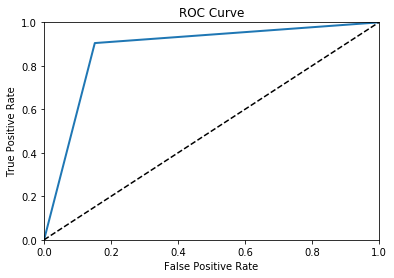

In [36]:
log_predictions, log_res_results = predict_and_evaluate_on_metrics(log_reg, data_test_prepared, data_test_labels)

Confusion matrix, without normalization
[[28  5]
 [ 2 19]]


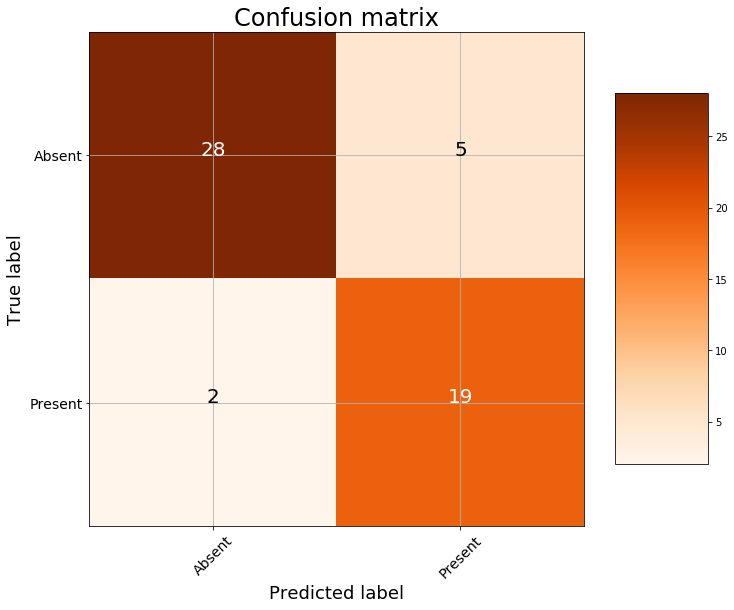

In [37]:
cm = confusion_matrix(data_test_labels, log_predictions)
plot_confusion_matrix(cm)

### SVM

In [38]:
from sklearn.svm import LinearSVC

In [39]:
svm_clf = Pipeline((
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(data_train_prepared, data_train_labels)

Pipeline(memory=None,
         steps=[('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

### TEST SET EVALUATION

Accuracy:  0.8703703703703703 
Precision:  0.9333333333333333 
Recall:  0.8484848484848485 
F1 score:  0.888888888888889


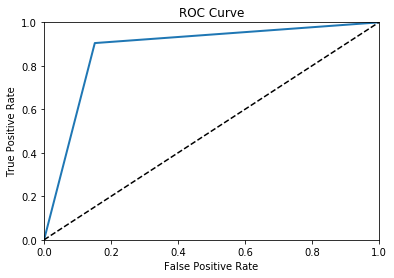

In [40]:
svm_predictions, svm_clf_results = predict_and_evaluate_on_metrics(svm_clf, data_test_prepared, data_test_labels)

Confusion matrix, without normalization
[[28  5]
 [ 2 19]]


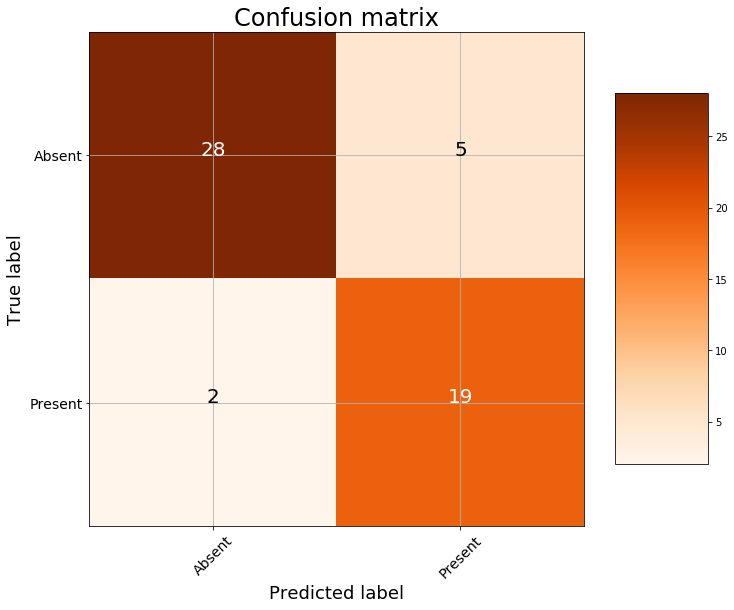

In [41]:
cm = confusion_matrix(data_test_labels, svm_predictions)
plot_confusion_matrix(cm)

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree_clf = DecisionTreeClassifier(max_depth=20)

tree_clf_cv_scores = cross_val_score(tree_clf, data_train_prepared, data_train_labels, 
                             scoring="f1", cv=5)
display_results(tree_clf_cv_scores)
tree_clf.fit(data_train_prepared, data_train_labels)

-----------------------------------------

Cross Validation F1

Scores:  [0.64150943 0.73913043 0.86956522 0.69767442 0.63829787]
Average F1:  0.7172354754162507

-----------------------------------------



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### TEST SET EVALUATION

Accuracy:  0.7037037037037037 
Precision:  0.8148148148148148 
Recall:  0.6666666666666666 
F1 score:  0.7333333333333333


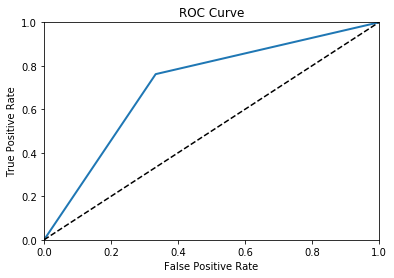

In [44]:
tree_predictions, tree_clf_results = predict_and_evaluate_on_metrics(tree_clf, data_test_prepared, data_test_labels)

Confusion matrix, without normalization
[[22 11]
 [ 5 16]]


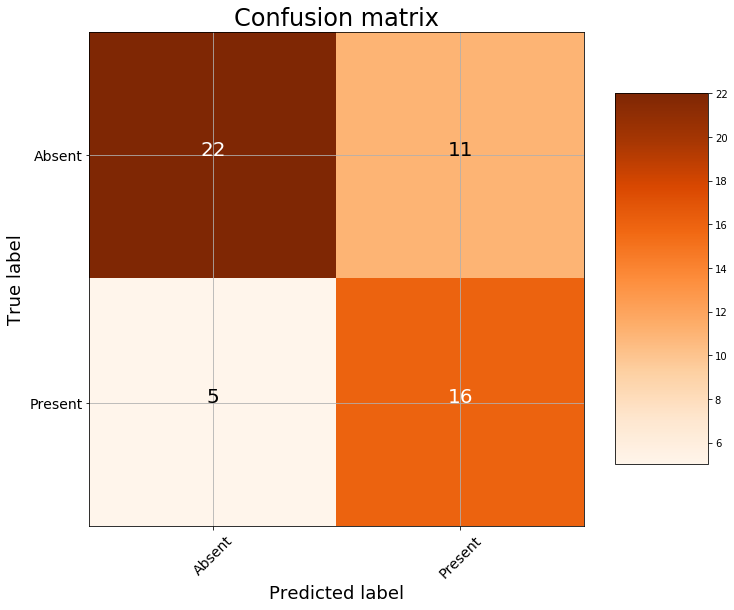

In [45]:
cm = confusion_matrix(data_test_labels, tree_predictions)
plot_confusion_matrix(cm)

Let's visualize tree

In [46]:
from sklearn.tree import export_graphviz

In [47]:
tree_g = export_graphviz(tree_clf, out_file='tree.dot', rounded = True, proportion = False, 
                precision = 2, filled = True)

In [48]:
!dot -Tpng tree.dot -o tree.png

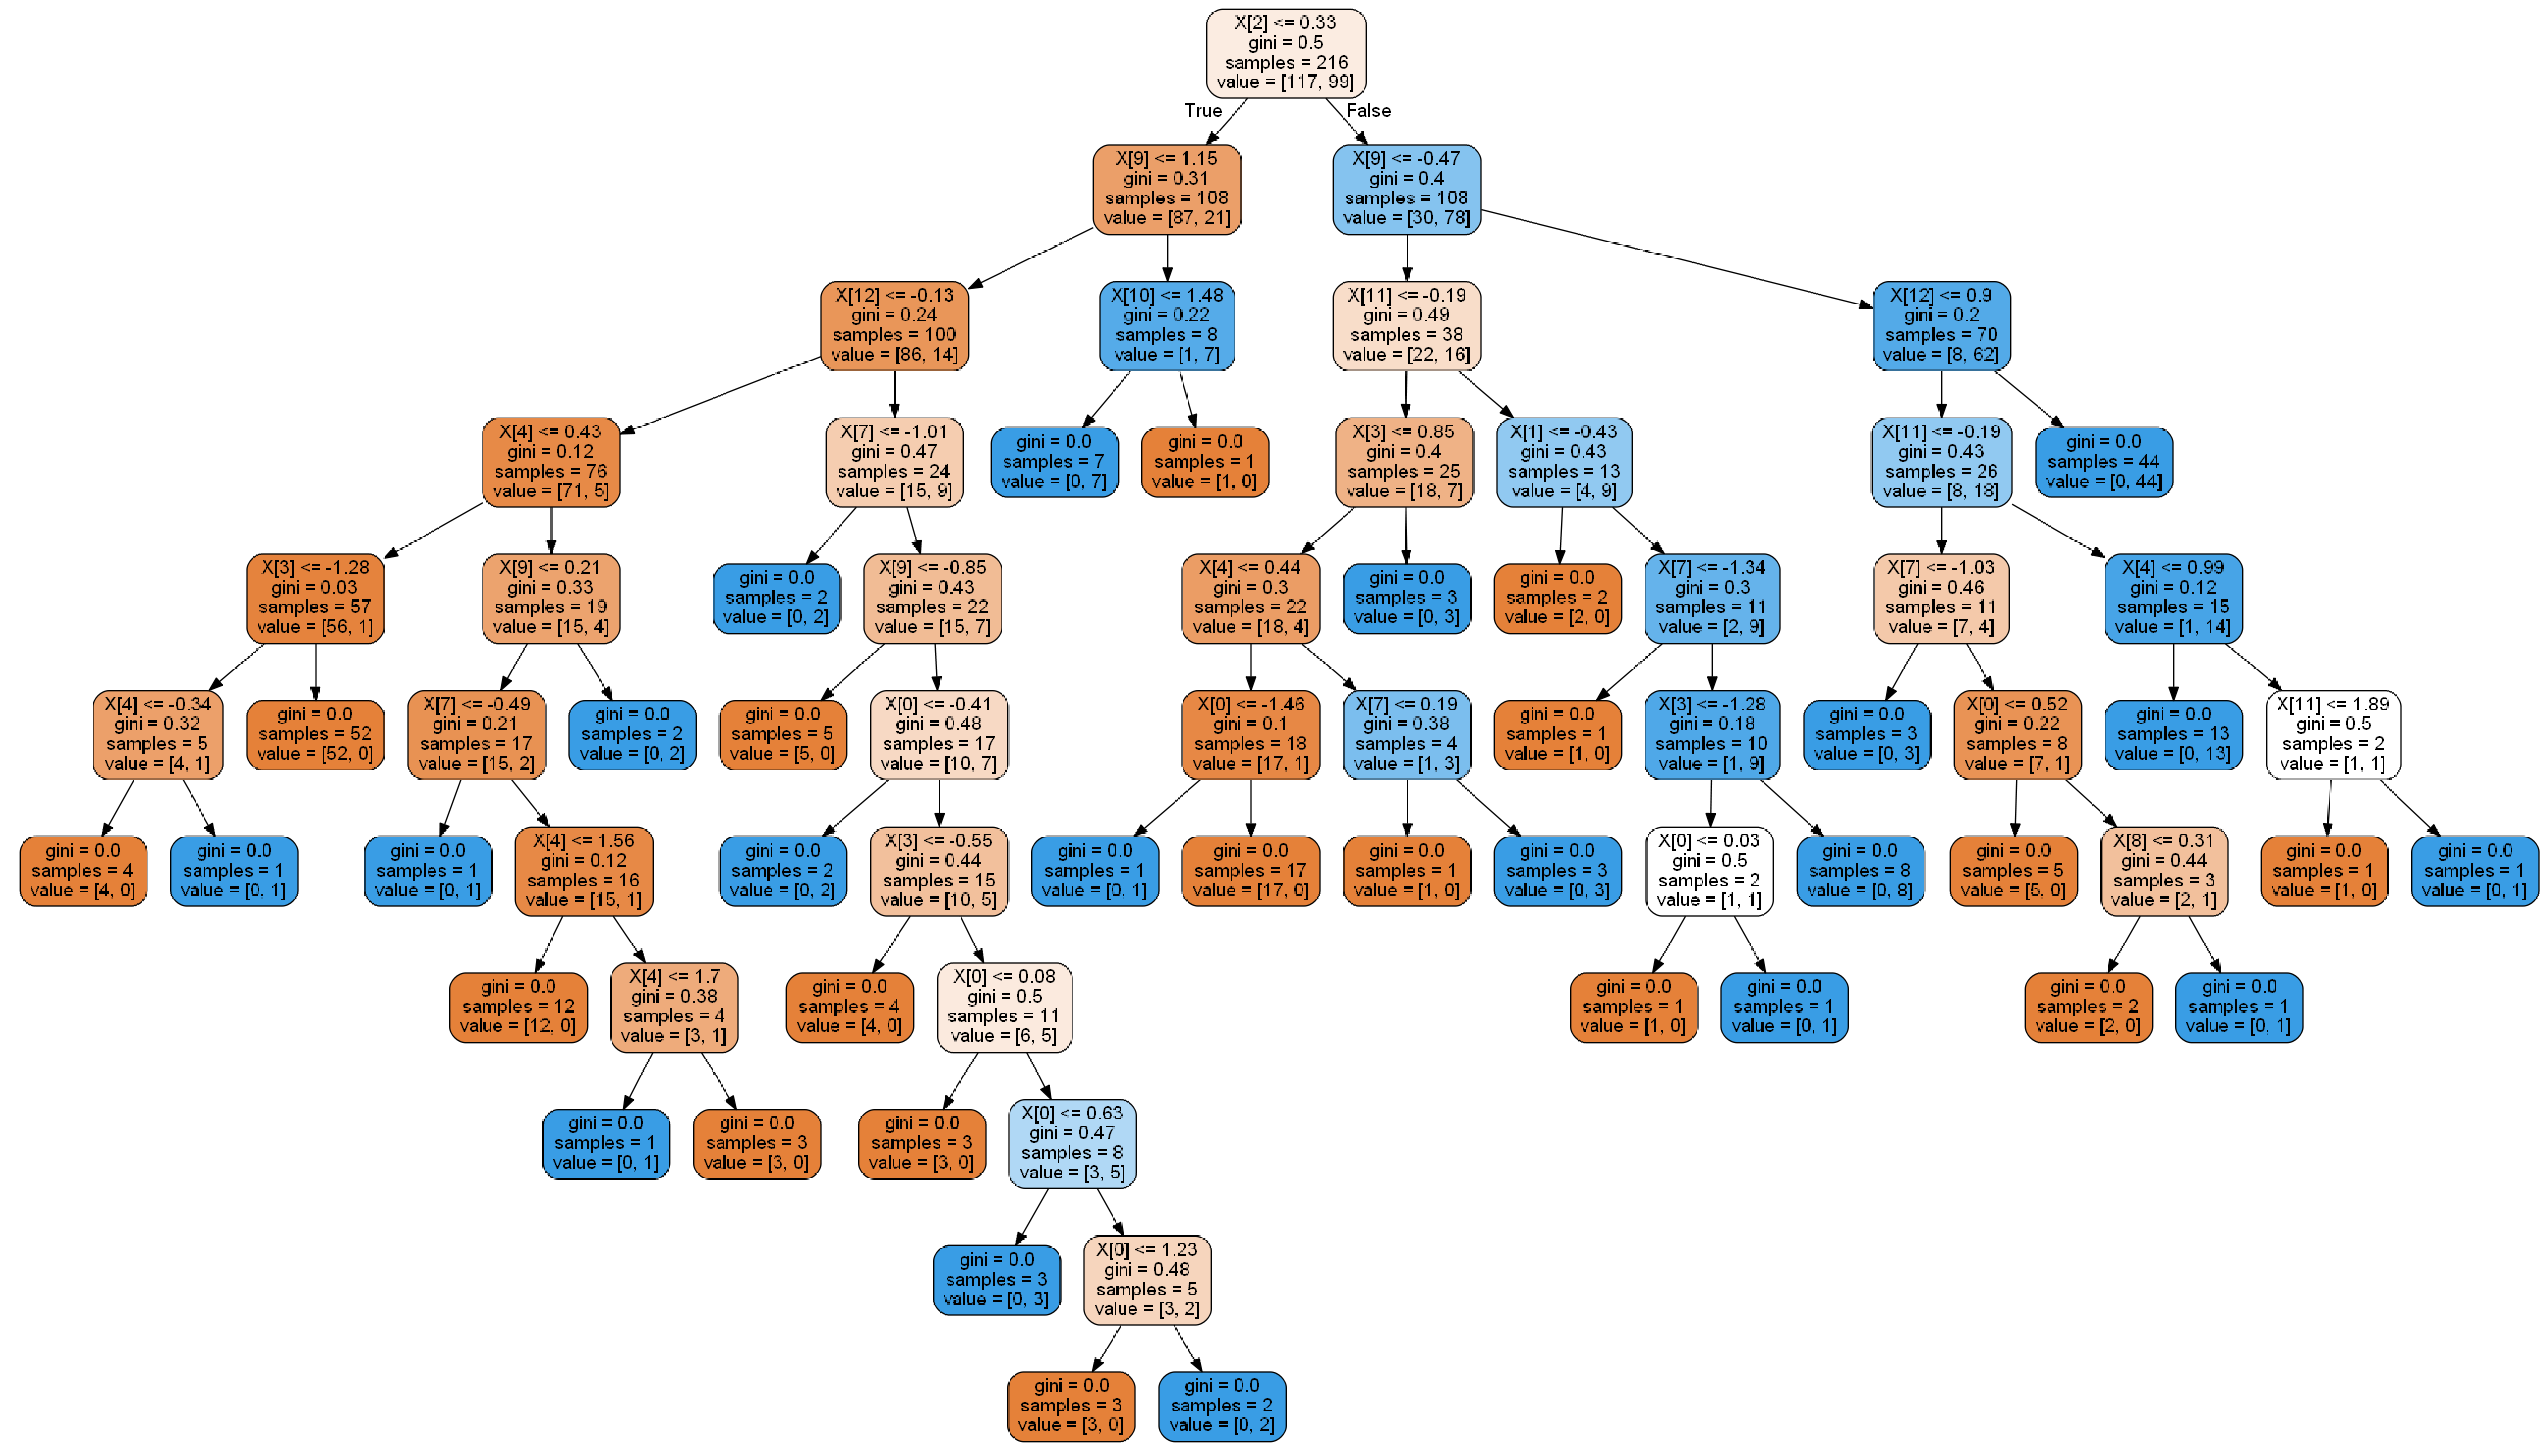

In [49]:
plt.figure(figsize = (120, 130))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rnd_clf = RandomForestClassifier()
rnd_clf_cv_scores = cross_val_score(rnd_clf, data_train_prepared, data_train_labels, 
                             scoring="f1", cv=5)
display_results(rnd_clf_cv_scores)
rnd_clf.fit(data_train_prepared, data_train_labels)

-----------------------------------------

Cross Validation F1

Scores:  [0.77777778 0.81632653 0.91666667 0.75       0.73913043]
Average F1:  0.7999802819678595

-----------------------------------------



C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### TEST SET EVALUATION

Accuracy:  0.7777777777777778 
Precision:  0.8 
Recall:  0.8484848484848485 
F1 score:  0.823529411764706


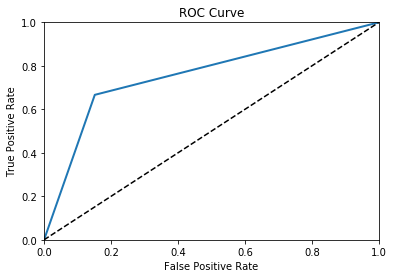

In [52]:
rnd_predictions, rnd_clf_results = predict_and_evaluate_on_metrics(rnd_clf, data_test_prepared, data_test_labels)

Confusion matrix, without normalization
[[28  5]
 [ 7 14]]


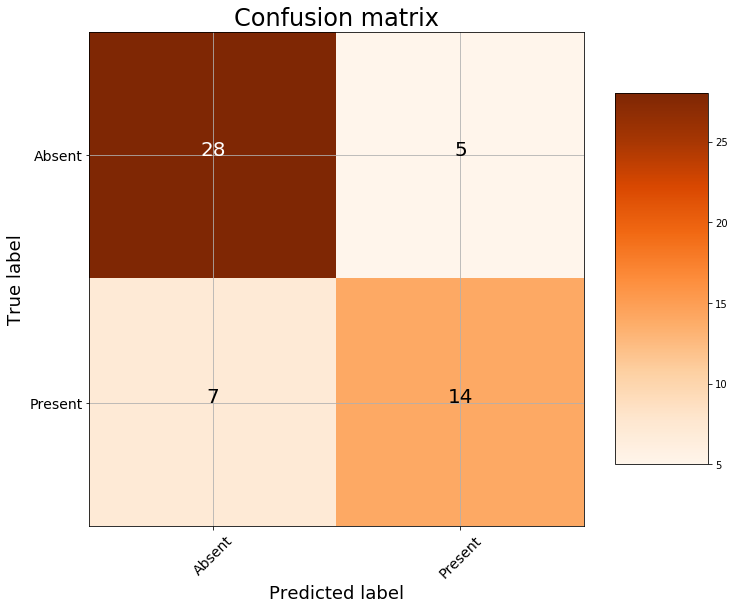

In [53]:
cm = confusion_matrix(data_test_labels, rnd_predictions)
plot_confusion_matrix(cm)

## Knn

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf_cv_scores = cross_val_score(knn_clf, data_train_prepared, data_train_labels, 
                             scoring="f1", cv=5)
display_results(knn_clf_cv_scores)
knn_clf.fit(data_train_prepared, data_train_labels)

-----------------------------------------

Cross Validation F1

Scores:  [0.80769231 0.82608696 0.88       0.88372093 0.81818182]
Average F1:  0.8431364025256846

-----------------------------------------



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### TEST SET EVALUATION

Accuracy:  0.8333333333333334 
Precision:  0.8529411764705882 
Recall:  0.8787878787878788 
F1 score:  0.8656716417910447


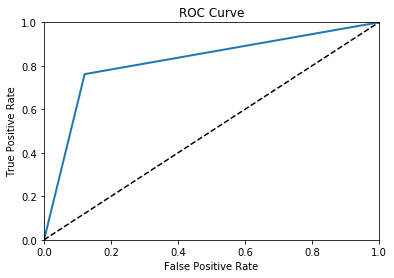

In [56]:
knn_predictions, knn_clf_results = predict_and_evaluate_on_metrics(knn_clf, data_test_prepared, data_test_labels)

Confusion matrix, without normalization
[[29  4]
 [ 5 16]]


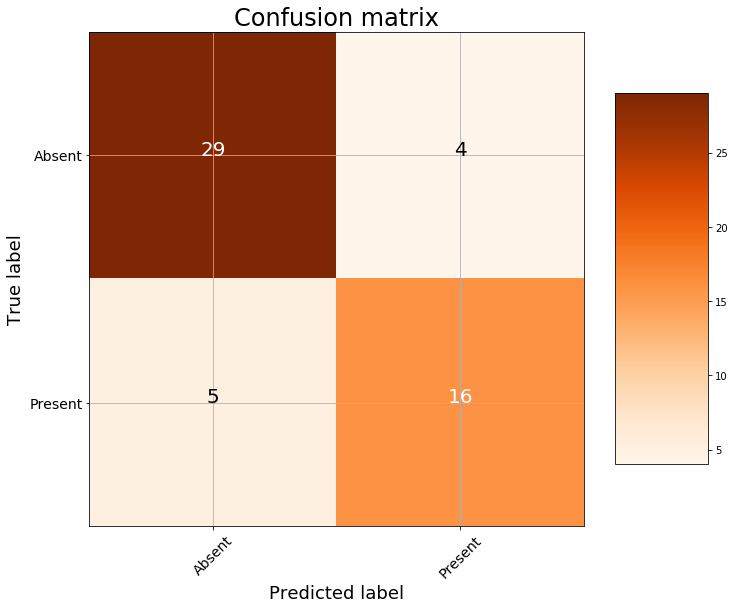

In [57]:
cm = confusion_matrix(data_test_labels, knn_predictions)
plot_confusion_matrix(cm)

### Keep results in test_results in order to compare with test_pca_results later

In [58]:
test_results = [log_res_results, svm_clf_results, tree_clf_results, rnd_clf_results, knn_clf_results]

#  (With PCA) Train and Test

Let's analyze data with PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
data_train.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal
115,49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0
33,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0
184,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
142,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0
197,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0


In [61]:
data_train_labels.head()

115    1
33     2
184    1
142    2
197    1
Name: presence, dtype: int64

In [62]:
data_train.shape

(216, 13)

In [63]:
pca = PCA(n_components=0.99)
data_pca = pca.fit_transform(data_train)

In [64]:
data_pca.shape

(216, 4)

In [65]:
data_pca

array([[ 2.04274419e+01, -1.40336038e+01,  2.73923897e+00,
         4.45191796e+00],
       [ 7.83977363e+01,  1.32442136e+01,  3.12842552e+01,
         4.54907996e+00],
       [-4.74089006e+00, -2.36565828e+01,  2.78220835e+00,
        -2.72319231e+00],
       [-1.70303455e+01, -1.23397175e+01,  1.12982267e+01,
         2.73039249e+00],
       [-3.76204238e+01, -1.10955187e+01, -1.74101269e+01,
        -4.55466244e+00],
       [ 2.51816665e+01,  2.77890443e+01,  2.20482037e+01,
         3.95708926e+00],
       [ 6.12790153e+01,  2.58043519e+01, -1.88703569e+00,
         1.65029120e+01],
       [ 5.89093271e+01, -1.28254617e-01,  5.07862968e+00,
         1.31056707e+01],
       [-2.63103840e+01, -2.14793542e+01,  6.60262572e+00,
        -8.05468644e+00],
       [-1.59067734e+01, -9.60937991e+00,  6.72459594e+00,
        -6.24922269e+00],
       [ 4.25947145e+00, -1.27955374e+01, -2.03994848e+00,
         4.77532618e-01],
       [ 1.05270067e+01, -3.55190096e+01,  1.38195194e+01,
      

## PCA Train and Test

I will use some of the PCA values in order to compare above models and their parameters with and without PCA processed data.


I will use a list of PCAs and train each model and evaluate on test set. 

Later I will pick the best result from PCA set and compare with model trained not on PCA

In [66]:
pca_list = [0.7, 0.75, 0.8, 0.85, 0.91, 0.95, 0.96, 0.97, 0.98]

log_reg_pca = LogisticRegression()
svm_clf_pca = Pipeline((
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))
tree_clf_pca = DecisionTreeClassifier(max_depth=20)
rnd_clf_pca = RandomForestClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)

models = [log_reg_pca, svm_clf_pca, tree_clf_pca, rnd_clf_pca, knn_clf]

test_pca_results = []

for pca_num in pca_list:
    
    print('--->  PCA', pca_num)
    
    pca = PCA(n_components=pca_num)
    data_train_pca = pca.fit_transform(data_train)
    data_test_pca = pca.fit_transform(data_test)
    
    pca_result = []
    
    for model_idx, model in enumerate(models):
        
        temp_model = model
        temp_model.fit(data_train_pca, data_train_labels)
        results = predict_and_evaluate_on_metrics(temp_model, data_test_pca, data_test_labels, display=False)
        pca_result.append(results)
        print('Model ', model_idx, 'Done')
    print('\n')
    
    test_pca_results.append(pca_result)

--->  PCA 0.7
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.75
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.8
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.85
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.91
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.95


C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "th

Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.96
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.97
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done


--->  PCA 0.98
Model  0 Done
Model  1 Done
Model  2 Done
Model  3 Done
Model  4 Done




C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warni

## Compare TEST and BEST PCA TEST

In [73]:
def pca_model_results(results, model_index, metrics_index):
    best_pca_index = None
    best_eval_val_on_metric = -1
    best_pca_result = None
    
    for pca_index, pca_result in enumerate(results):
        model_pca = pca_result[model_index][1]
        if model_pca[metrics_index] > best_eval_val_on_metric:
            best_eval_val_on_metric = model_pca[metrics_index]
            best_pca_result = model_pca
            best_pca_index = pca_index
    return best_pca_index, best_pca_result

def print_pca_result(pca_list, pca_index, pca_result):
    print('\n--------------- BEST PCA EXPERIMENT RESULT ------------------\n')
    print('-------> PCA: ', pca_list[pca_index], '\n')
    print('', '\nAccuracy: ', pca_result[0],
              '\nPrecision: ', pca_result[1], 
              '\nRecall: ', pca_result[2], 
              '\nF1 score: ', pca_result[3])
def print_test_resul_no_pca(result):
    print('\n-------> TEST with NO PCA \n')
    print('', '\nAccuracy: ', result[0],
              '\nPrecision: ', result[1], 
              '\nRecall: ', result[2], 
              '\nF1 score: ', result[3])
    
    
def plot_test_and_pca_result(title, results, metrics_index):
    plt.style.use('ggplot')
    x = ['Linear Regression', 'Decision Tree', 'Random Forest']
    vals = []
    for model in results:
        vals.append(model[metrics_index])

    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, vals, color=['red', 'green', 'blue'])
    plt.bar(x_pos, vals, color=['red', 'green', 'blue'])
    plt.xlabel("Models")
    plt.ylabel("Value")
    plt.title(title)
    plt.xticks(x_pos, x)
    plt.show()
    
def show_comparison(model, best_pca, title):
    width = 0.5
    fig, ax = plt.subplots()

    accuracy = (model[0], best_pca[0])
    ax.bar([0, 3], accuracy, width, color='r')

    precision = (model[1], best_pca[1])
    ax.bar([0.5, 3.5], precision, width, color='g')

    recall = (model[2], best_pca[2])
    ax.bar([1, 4], recall, width, color='b')

    f1 = (model[3], best_pca[3])
    ax.bar([1.5, 4.5], f1, width, color='y')


    ax.legend(('Accuracy', 'Precision', 'Recall', 'F1 Score'))
    ax.set_ylabel('Scores %')
    ax.set_title(title)
    ax.set_xticks([0.8, 3.8])
    ax.set_xticklabels(('NO PCA TEST', 'PCA TEST'))
    plt.show()

So, above I have written some functions that allows us to find best PCA for particular models and metrics

Models and their index for variable model_index:
    * Logistics Regression - 0
    * SVM Classifier - 1
    * Decision Tree Classifier - 2
    * Random Forest Classifier - 3
    * KNN - 4

Evaluation metrics and indexes for variable metrics_index:
    * Accuracy - 0
    * Precision - 1
    * Recall - 2
    * F1 score - 3

I will set metrics_index as Accuracy, since our dataset is balanced

In [74]:
metrics_index = 0

### LogisticRegression

In [75]:
model_index = 0

In [76]:
log_reg_best_pca_index, log_reg_best_pca = pca_model_results(test_pca_results, model_index=model_index, 
                                                             metrics_index=metrics_index)

In [77]:
print_pca_result(pca_list, log_reg_best_pca_index, log_reg_best_pca)
print_test_resul_no_pca(test_results[model_index])


--------------- BEST PCA EXPERIMENT RESULT ------------------

-------> PCA:  0.75 

 
Accuracy:  0.7962962962962963 
Precision:  0.8666666666666667 
Recall:  0.7878787878787878 
F1 score:  0.8253968253968254

-------> TEST with NO PCA 

 
Accuracy:  0.8703703703703703 
Precision:  0.9333333333333333 
Recall:  0.8484848484848485 
F1 score:  0.888888888888889


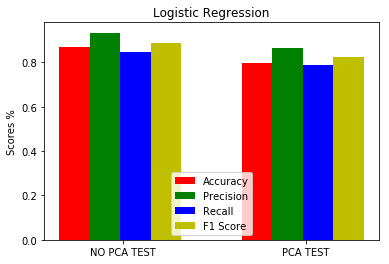

In [78]:
show_comparison(test_results[model_index], log_reg_best_pca, title='Logistic Regression')

#### Conclusion: Model without BEST PCA shows Better performance

### SVM Classifier

In [79]:
model_index = 1

In [80]:
svm_clf_best_pca_index, svm_clf_best_pca = pca_model_results(test_pca_results, model_index=model_index, 
                                                             metrics_index=metrics_index)

In [81]:
print_pca_result(pca_list, svm_clf_best_pca_index, svm_clf_best_pca)
print_test_resul_no_pca(test_results[model_index])


--------------- BEST PCA EXPERIMENT RESULT ------------------

-------> PCA:  0.91 

 
Accuracy:  0.7592592592592593 
Precision:  0.8333333333333334 
Recall:  0.7575757575757576 
F1 score:  0.7936507936507938

-------> TEST with NO PCA 

 
Accuracy:  0.8703703703703703 
Precision:  0.9333333333333333 
Recall:  0.8484848484848485 
F1 score:  0.888888888888889


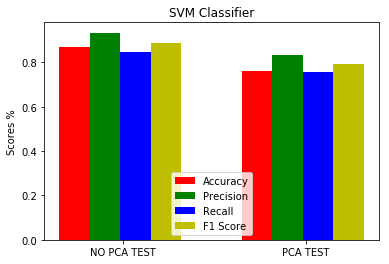

In [82]:
show_comparison(test_results[model_index], svm_clf_best_pca, title='SVM Classifier')

#### Conclusion: Model without BEST PCA shows Better performance

### Decision Tree

In [83]:
model_index = 2

In [84]:
tree_clf_best_pca_index, tree_clf_best_pca = pca_model_results(test_pca_results, model_index=model_index, 
                                                             metrics_index=metrics_index)

In [85]:
print_pca_result(pca_list, tree_clf_best_pca_index, tree_clf_best_pca)
print_test_resul_no_pca(test_results[model_index])


--------------- BEST PCA EXPERIMENT RESULT ------------------

-------> PCA:  0.85 

 
Accuracy:  0.7037037037037037 
Precision:  0.8695652173913043 
Recall:  0.6060606060606061 
F1 score:  0.7142857142857143

-------> TEST with NO PCA 

 
Accuracy:  0.7037037037037037 
Precision:  0.8148148148148148 
Recall:  0.6666666666666666 
F1 score:  0.7333333333333333


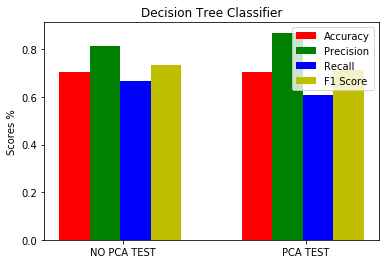

In [86]:
show_comparison(test_results[model_index], tree_clf_best_pca, title='Decision Tree Classifier')

#### Conclusion:Almost same performance

### Random Forest

In [87]:
model_index = 3

In [88]:
rnd_clf_best_pca_index, rnd_clf_best_pca = pca_model_results(test_pca_results, model_index=model_index, 
                                                             metrics_index=metrics_index)

In [89]:
print_pca_result(pca_list, rnd_clf_best_pca_index, rnd_clf_best_pca)
print_test_resul_no_pca(test_results[model_index])


--------------- BEST PCA EXPERIMENT RESULT ------------------

-------> PCA:  0.8 

 
Accuracy:  0.7592592592592593 
Precision:  0.8125 
Recall:  0.7878787878787878 
F1 score:  0.8

-------> TEST with NO PCA 

 
Accuracy:  0.7777777777777778 
Precision:  0.8 
Recall:  0.8484848484848485 
F1 score:  0.823529411764706


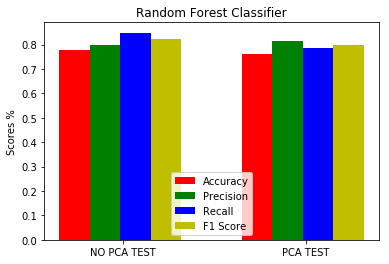

In [90]:
show_comparison(test_results[model_index], rnd_clf_best_pca, title='Random Forest Classifier')

#### Conclusion:PCA is better

### KNN

In [91]:
model_index = 4

In [92]:
knn_clf_best_pca_index, knn_clf_best_pca = pca_model_results(test_pca_results, model_index=model_index, 
                                                             metrics_index=metrics_index)

In [93]:
print_pca_result(pca_list, knn_clf_best_pca_index, knn_clf_best_pca)
print_test_resul_no_pca(test_results[model_index])


--------------- BEST PCA EXPERIMENT RESULT ------------------

-------> PCA:  0.75 

 
Accuracy:  0.7592592592592593 
Precision:  0.8333333333333334 
Recall:  0.7575757575757576 
F1 score:  0.7936507936507938

-------> TEST with NO PCA 

 
Accuracy:  0.8333333333333334 
Precision:  0.8529411764705882 
Recall:  0.8787878787878788 
F1 score:  0.8656716417910447


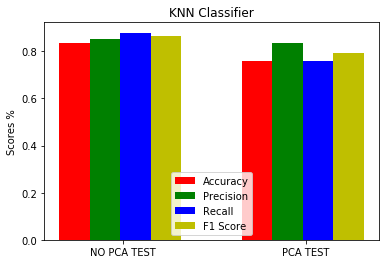

In [94]:
show_comparison(test_results[model_index], knn_clf_best_pca, title='KNN Classifier')

#### Conclusion:PCA is better